# 1.0 Loading Libraries

In [2]:
import numpy as np
import pandas as pd
import os
import datetime 
import matplotlib.pyplot as plt

# 2.0 Loading Bike Sharing Data

In [3]:
data = pd.read_csv("D:/Games/Bike_Sharing_dataset/london_merged.csv")

In [4]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
# get the shape of the dataset
print('The dataset contains {} rows and {} columns'.format(data.shape[0], data.shape[1]))

The dataset contains 17414 rows and 10 columns


In [6]:
#  generate descriptive statistics for the dataset
data.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [7]:
data["timestamp"] = pd.to_datetime(data["timestamp"])
data = data.set_index("timestamp")

# Get the earliest and latest date in the dataset
print("Earliest date in dataset: {}".format(min(data.index)))
print("Latest date in dataset: {}".format(max(data.index)))

Earliest date in dataset: 2015-01-04 00:00:00
Latest date in dataset: 2017-01-03 23:00:00


# 3.0 Data Cleaning

Before performing any sort of analysis on the dataset, it is important to check for missing values, duplicates, and inconsistencies in the dateaset.

In [8]:
# check for missing values
print(data.isnull().sum())

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64


In [9]:
# check for duplicates
print(data.duplicated().sum())

2


In [10]:
duplicates = data[data.duplicated()]
duplicates

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2016-07-07 02:00:00,159,17.0,17.0,68.0,11.0,1.0,0.0,0.0,1.0
2016-08-30 06:00:00,725,15.5,15.5,74.5,9.0,1.0,0.0,0.0,1.0


In [11]:
# check for inconsistencies
data.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


From the generated table containing various summary statistics for each numerical column in the DataFrame, it seems that there appear to be no inconsistencies. All of the columns have reasonable/expected minimum/maximum values. The mean and median for each column is similar. However we can use additional methods to investigate further potential inconsistencies in the data. 

We can use different visualizations such as histograms or scatterplots to explore the distribution of the data and identify potential outliers or anomalies.

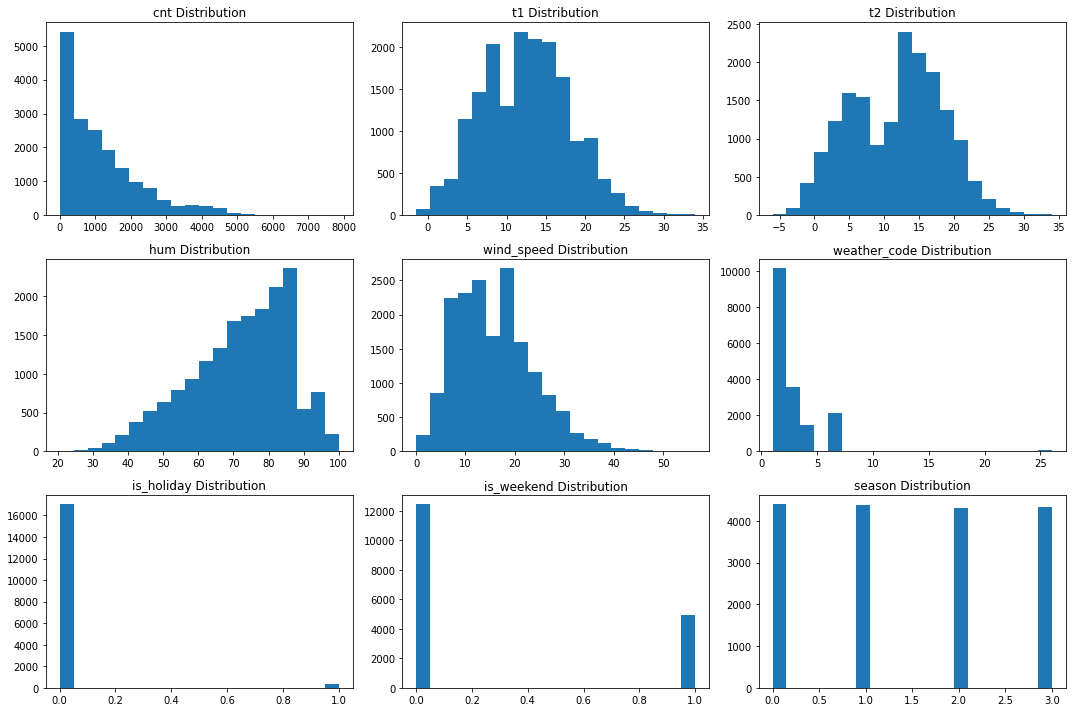

In [12]:
# create a 3 x 3 grid of subplots 
fig, axs = plt.subplots(3,3, figsize = (15,10))

# flatten array to make easier to access each subplot
axs = axs.ravel()

# loop over each column in the dataframe and plot a histogram
for i,column in enumerate(data.columns):
    axs[i].hist(data[column], bins = 20)
    axs[i].set_title('{} Distribution'.format(column))
    
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

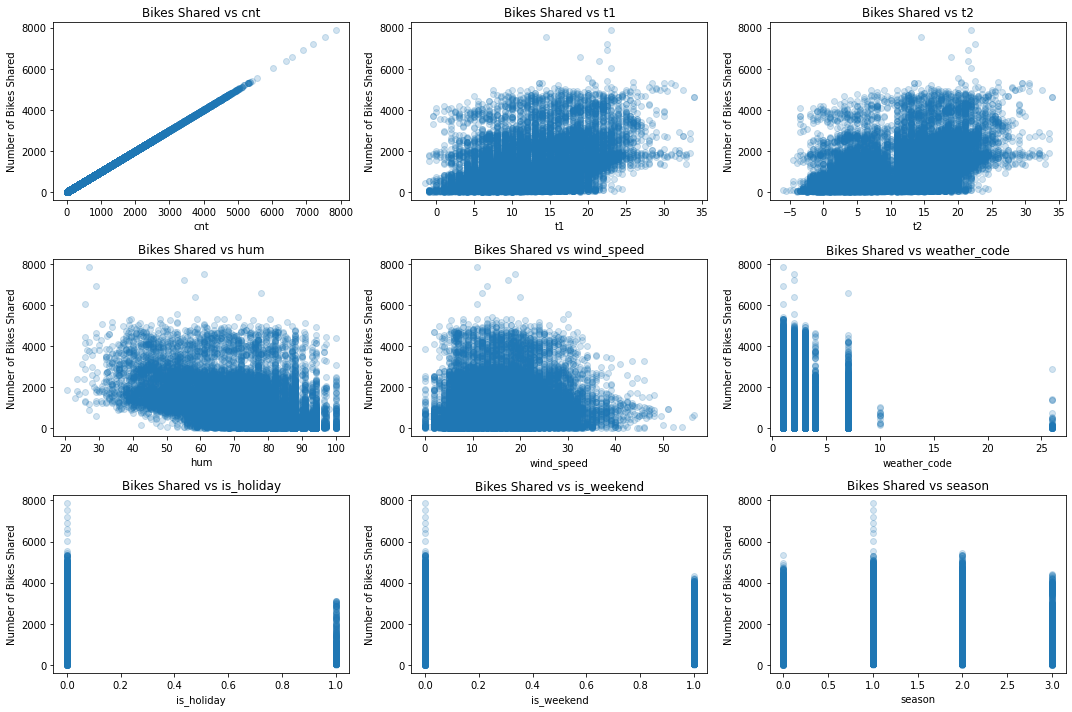

In [13]:
# create a 3 x 3 grid of subplots 
fig, axs = plt.subplots(3,3, figsize = (15,10))

# flatten array to make easier to access each subplot
axs = axs.ravel()

# loop over each column in the dataframe and plot a histogram
for i,column in enumerate(data.columns):
    axs[i].scatter(data[column], data["cnt"], alpha = 0.2)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Number of Bikes Shared")
    axs[i].set_title('Bikes Shared vs {}'.format(column))
    
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

Here are some takeaways from these scatterplots:

* More bikes are shared on days that aren't holidays, most likely because many people who use bike sharing do so for work.
* More bikes are shared on weekdays, which again is likely because of the work commute.
* More bikes are shared during the Summer (1.0) and Fall (2.0) seasons, with fewer people sharing bikes during the Spring (0.0) and Winter (3.0) seasons.
* Fewer people do bike sharing when wind speeds are high.

# 4.0 Data Exploration & Visualization

We can perform further analysis on the number of bikes shared to see if it is consistent with some of the patterns we observed through our scatter plots. 

#### Bikes Shared throughout days of Week

We can look at the number of bikes shared during the days of the week:

In [14]:
# Create a new dataframe which changes the frequency of the data to daily
data_daily = data.resample("D").sum()
data_daily.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04,9234,59.5,15.5,2262.5,180.0,69.0,0.0,24.0,72.0
2015-01-05,20372,193.0,161.0,1927.5,212.5,80.0,0.0,0.0,72.0
2015-01-06,20613,188.5,128.0,1893.5,384.0,74.0,0.0,0.0,72.0
2015-01-07,21064,171.5,103.5,1796.5,454.5,60.0,0.0,0.0,69.0
2015-01-08,15601,234.0,187.0,1903.5,491.5,84.0,0.0,0.0,72.0


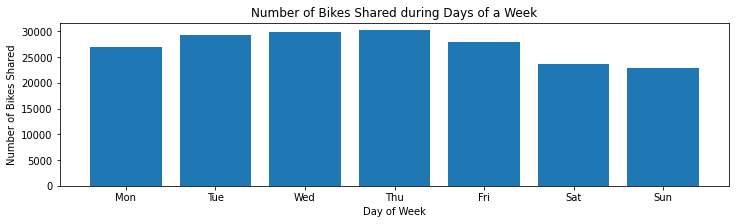

In [15]:
# Group the data by day of week and get the mean of 'cnt' column
data_weekday = data_daily.groupby(data_daily.index.dayofweek).mean()

# Plot the data
fig = plt.figure(figsize = (12,3))
plt.bar(data_weekday.index, data_weekday["cnt"])
plt.xticks(range(7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.xlabel("Day of Week")
plt.ylabel("Number of Bikes Shared")
plt.title("Number of Bikes Shared during Days of a Week")
plt.show()

The bar chart reveals that bike sharing is more prevalent on weekdays than on weekends. This observation aligns with the scatterplot, which suggests that bike sharing is commonly used for commuting to work.

### 4.1 Bikes Shared Throughout the day on Workdays


Next we can take a look at bike sharing during the hours of day for a workday.

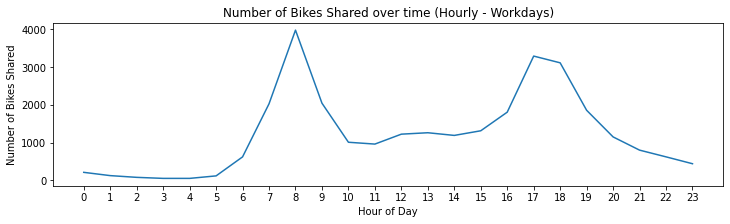

In [16]:
# get data for work days
data_workdays = data[(data["is_holiday"] == 0) & (data["is_weekend"] == 0)]

# group data by hour and average cnt column
data_workdays_hourly = data_workdays.groupby(data_workdays.index.hour)['cnt'].mean()

# plot the hourly counts
fig = plt.figure(figsize = (12,3))
plt.plot(data_workdays_hourly.index, data_workdays_hourly.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared over time (Hourly - Workdays)')

# include xticks every hour
plt.xticks(range(0,24))

plt.show()

The chart confirms that the main purpose of using bikes is for commuting to work, as indicated by the two peaks observed at 8 (8 am) and 17 (5 pm), which may suggest that people ride their bikes at 8 am to arrive at work by 9 am and at 5 pm to return home after work. This assumption is based on a typical workday schedule of 9 to 5.

### 4.2 Bikes Shared Throughout the day on Weekends and Holidays

We can also take a look at bikes shared throughout the day for days that are weekends and holidays.

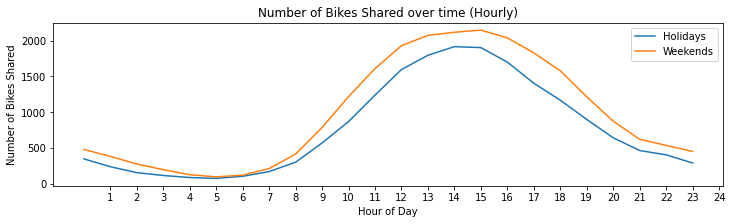

In [17]:
# get data for holidays
data_holidays = data[data["is_holiday"] == 1]

# group data by hour and sum cnt column
data_holidays_hourly = data_holidays.groupby(data_holidays.index.hour)['cnt'].mean()

# get data for weekends
data_weekends = data[data["is_weekend"] == 1]

# group data by hour and sum cnt column
data_weekends_hourly = data_weekends.groupby(data_weekends.index.hour)['cnt'].mean()

# plot the hourly counts for holidays and weekends on the same graph
fig = plt.figure(figsize=(12,3))
plt.plot(data_holidays_hourly.index, data_holidays_hourly.values, label='Holidays')
plt.plot(data_weekends_hourly.index, data_weekends_hourly.values, label='Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared over time (Hourly)')
plt.legend()

# include xticks every hour
plt.xticks(range(1,25))

plt.show()


These plots reveal that the pattern of bike usage during weekends and holidays is similar, with the highest number of bikes being shared between hours 13-16.

### 4.3 Bikes Shared vs Weather Code

Analyze how the average number of bikes shared varies for different weather codes.

* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog

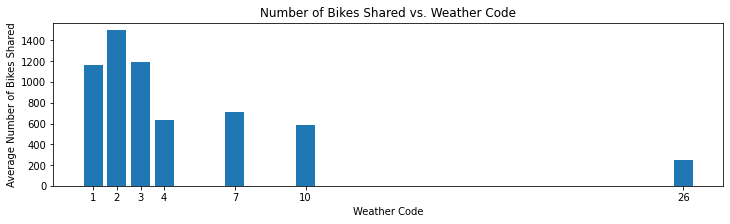

In [18]:
# group data by weather_code and get the average cnt
data_weather = data.groupby('weather_code')['cnt'].mean()

# plot the data
fig = plt.figure(figsize = (12,3))

plt.bar(data_weather.index, data_weather.values)
plt.xlabel('Weather Code')
plt.ylabel('Average Number of Bikes Shared')
plt.title('Number of Bikes Shared vs. Weather Code')

plt.xticks([1, 2, 3, 4, 7, 10, 26])
plt.show()

We can observe from the bar plot that the majority of people prefer to ride bikes on days with weather codes 1, 2, and 3, which indicates good weather conditions.

### 4.4 Bikes Shared vs T1 (Real Temperature in C) and T2 ('Feels like' Temperature in C)

We will now compare the number of shared bikes with temperature by grouping temperature into bins, which will make the visualizations more understandable.

In [19]:
# get the min and max values of t1 and t2
max_t1 = data["t1"].max()
min_t1 = data["t1"].min()
max_t2 = data["t2"].max()
min_t2 = data["t2"].min()

print("T1 Max Temperature: {} T1 Min Temperature: {}".format(max_t1, min_t1))
print("T2 Max Temperature: {} T2 Min Temperature: {}".format(max_t2, min_t2))

T1 Max Temperature: 34.0 T1 Min Temperature: -1.5
T2 Max Temperature: 34.0 T2 Min Temperature: -6.0


In [20]:
# create bins for t1 and t2
t_bins = np.arange(-10.0, 40.0, 5.0)
data["t1_bins"] = pd.cut(data["t1"], bins = t_bins)
data["t1_bins"] = data["t1_bins"].apply(lambda x: x.right)
data["t2_bins"] = pd.cut(data["t2"], bins = t_bins)
data["t2_bins"] = data["t2_bins"].apply(lambda x: x.right)

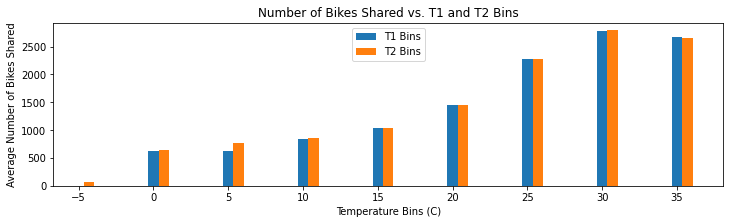

In [21]:
# group data by t1_bins and t2_bins and get the average cnt
data_t1 = data.groupby('t1_bins')['cnt'].mean()
data_t2 = data.groupby('t2_bins')['cnt'].mean()

# create a figure with a single subplot
fig, ax = plt.subplots(figsize=(12, 3))

# plot the data for T1 bins
ax.bar(data_t1.index, data_t1.values, width=0.7, label='T1 Bins')

# plot the data for T2 bins
ax.bar(data_t2.index.astype(float) + 0.7, data_t2.values, width=0.7, label='T2 Bins')

# add x-axis labels, y-axis label, and title
ax.set_xlabel('Temperature Bins (C)')
ax.set_ylabel('Average Number of Bikes Shared')
ax.set_title('Number of Bikes Shared vs. T1 and T2 Bins')

# add legend
ax.legend()

# show the plot
plt.show()


The bar chart reveals a positive correlation between the average number of bikes shared and temperature. Interestingly, temperatures falling under bin 30 exhibit a higher number of shared bikes compared to temperatures falling under bin 35. This indicates that more people share bikes when temperature falls under bin 30 due to comfortability and it is not too hot.

### 4.5 Bikes Shared vs Humidity

We will now compare the number of shared bikes with humidity by grouping humidity into bins, which will make the visualizations more understandable.

In [22]:
# get the min and max values of hum
max_hum = data["hum"].max()
min_hum = data["hum"].min()

print("Max Humidity %: {}".format(max_hum))
print("Min Humidity %: {}".format(min_hum))

Max Humidity %: 100.0
Min Humidity %: 20.5


In [23]:
# create bins hum
hum_bins = np.arange(20.0, 110.0, 10.0)
data["hum_bins"] = pd.cut(data["hum"].astype(float), bins = hum_bins)
data["hum_bins"] = data["hum_bins"].apply(lambda x: x.right)

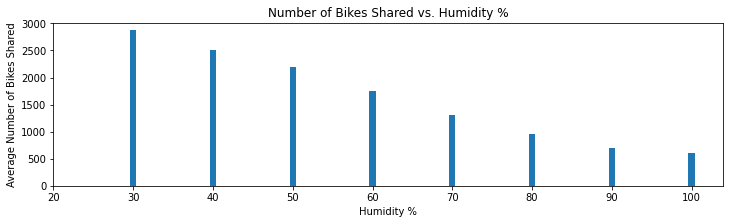

In [24]:
# group data by hum_bins and get the average cnt
data_hum = data.groupby('hum_bins')['cnt'].mean()

# plot the data
fig = plt.figure(figsize = (12,3))

plt.bar(data_hum.index, data_hum.values)
plt.xlabel('Humidity %')
plt.ylabel('Average Number of Bikes Shared')
plt.title('Number of Bikes Shared vs. Humidity %')

plt.xticks(hum_bins)
plt.show()

The bar chart reveals a negative correlation between humidity and the number of bikes shared, as an increase in humidity results in a decrease in the number of bikes shared.

### 4.6 Bikes Shared vs Wind Speeds

We will now compare the number of shared bikes with wind speeds by grouping wind speeds into bins, which will make the visualizations more understandable.

In [25]:
# get the min and max values of wind_speed
max_wind_speed = data["wind_speed"].max()
min_wind_speed = data["wind_speed"].min()

print("Max Wind Speed km/h: {}".format(max_wind_speed))
print("Min Wind Speed km/h: {}".format(min_wind_speed))

Max Wind Speed km/h: 56.5
Min Wind Speed km/h: 0.0


In [26]:
# create bins wind_speed
wind_speed_bins = np.arange(-5.0, 65.0, 5.0)
data["wind_speed_bins"] = pd.cut(data["wind_speed"], bins = wind_speed_bins)
data["wind_speed_bins"] = data["wind_speed_bins"].apply(lambda x: x.right)

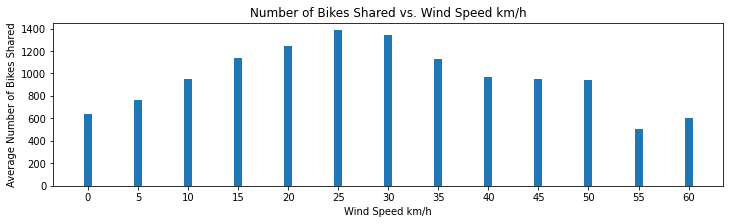

In [27]:
# group data by wind_speed_bins and get the average cnt
data_wind_speed = data.groupby('wind_speed_bins')['cnt'].mean()

# plot the data
fig = plt.figure(figsize = (12,3))

plt.bar(data_wind_speed.index, data_wind_speed.values)
plt.xlabel('Wind Speed km/h')
plt.ylabel('Average Number of Bikes Shared')
plt.title('Number of Bikes Shared vs. Wind Speed km/h')

plt.xticks(wind_speed_bins[1:])
plt.show()

The average number of shared bikes vs wind speeds follows a normal distribution. This means that there is a relatively balanced relationships between wind speed and the average number of shared bikes. In other words, there is no significant skewness or bias towards a particular wind speed range.

We will now perform further visualization primarly involving the `cnt` column which is the number of bikes shared to learn more about how the number of bikes shared over different periods of time. These are time series plots.

# 5.0 Time Series Components

The components of a time series refer to the underlying factors that contribute to the overall behaviour of the time series data.

* **Trend**: The long-term movement or direction of the time series. A trend can be increasing, decreasing, or stable.
* **Seasonality**: The repeating pattern of variation in the time series at regular intervals. Seasonality can be daily, weekly, monthly, quarterly, or yearly.
* **Residual**: The random or unpredictable variation in the time series that is not explained by the other components. Residual components can be due to unexpected events, measurement error, or other factors.

A time series can be broken down to their individual components using Seasonal Decomposition. We will perform seasonal decomposition on each time series using different periods of time.

### 5.0.1 Hourly Bike Sharing Time Series Plot

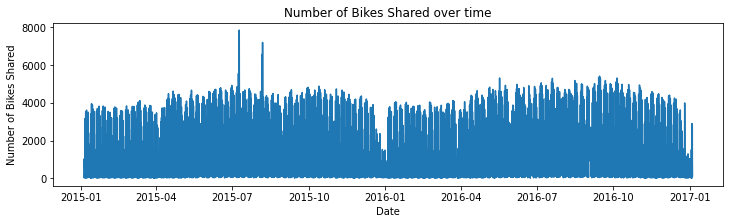

In [28]:
# visualize the number of bikes shared over time
fig = plt.figure(figsize = (12,3))
plt.plot(data.index, data['cnt'])
plt.xlabel('Date')
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared over time')
plt.show()

From this time series, it is hard to extract much insight because the `timestamp` attribute is measured every hour. However, one thing we can observe is that there appears to be two distinct peaks that stand out more amongst the rest. We will further investigate these later in the notebook to figure why the number of bikes shared was so high during those times.

For now we will plot time series plots on different time scales to identify if there are different kinds of seasonality present in our data.

### 5.0.2 Bikes Shared Hourly

To check for any indications of daily seasonality, we will generate a time series plot that shows the hourly count of shared bikes over the course of one week.

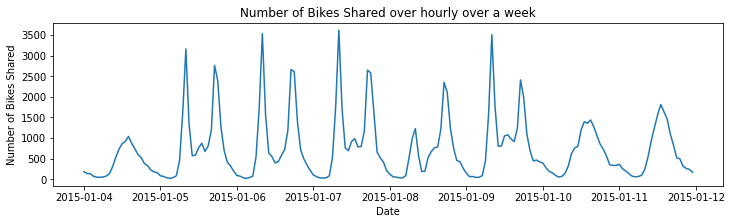

In [29]:
data_subset = data.loc['2015-01-04': '2015-01-11']

# visualize the number of bikes shared hourly over a week
fig = plt.figure(figsize = (12,3))
plt.plot(data_subset.index, data_subset['cnt'])
plt.xlabel('Date')
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared over hourly over a week')
plt.show()

The time series plot indicates the presence of **daily seasonality**, meaning that there is a recurring pattern that repeats over a 24-hour period. Specifically, the weekdays between 2015-01-05 and 2015-01-09 exhibit a similar pattern, whereas the weekends (2015-01-04, 2015-01-10, and 2015-01-11) display a distinct pattern from the weekdays. 

During the weekdays, there are two peaks - one in the morning, followed by a dip, and then another peak later in the day. On the weekends, there is a single peak in the middle of the day.

The Trend component appears to be stable in this time series as it is neither increasing or decreasing.

In [30]:
data_subset.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,t1_bins,t2_bins,hum_bins,wind_speed_bins
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,5.0,5.0,100.0,10.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,5.0,5.0,100.0,5.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,5.0,5.0,100.0,0.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,5.0,5.0,100.0,0.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,5.0,0.0,100.0,10.0


In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

# seasonal decomposition for bikes shared hourly
decomposition_hourly = seasonal_decompose(data_subset['cnt'], 
                                   model = 'additive', 
                                   period = 24)

# plot the seasonal decomposition results
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12,8))
axes[0].plot(data_subset.index, data_subset['cnt'])
axes[0].set_ylabel('Original')
axes[1].plot(decomposition_hourly.trend)
axes[1].set_ylabel('Trend')
axes[2].plot(decomposition_hourly.seasonal)
axes[2].set_ylabel('Seasonal')
axes[3].plot(decomposition_hourly.resid)
axes[3].set_ylabel('Residual')
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

### 5.0.3 Bikes Shared Daily

To check for any indications of weekly seasonality, we will generate a time series plot that shows the daily count of shared bikes over the course of a few month.

In [ ]:
data_daily_subset = data_daily.loc['2015-01-04':'2015-04-01']

# plot the daily counts
fig = plt.figure(figsize = (12,3))
plt.plot(data_daily_subset.index, data_daily_subset['cnt'])
plt.xlabel('Date')
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared Daily over a few month')
plt.xticks(data_daily_subset.index[::7], rotation = 90) # show x-ticks for every 7 days
plt.show()

The time series plot reveals the existence of **weekly** seasonality, as a recurring pattern can be observed for each week. Sunday is represented by each x-tick, with `2015-01-04` being a Sunday. It is apparent that the count of shared bikes increases after each x-tick and then decreases as it approaches the next x-tick (the next Sunday). This pattern is in agreement with our earlier observation that more bikes are shared on weekdays.

In [ ]:
# seasonal decomposition for bikes shared daily
decomposition_daily = seasonal_decompose(data_daily_subset['cnt'], 
                                   model = 'additive', 
                                   period = 7)

# plot the seasonal decomposition results
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12,8))
axes[0].plot(data_daily_subset.index, data_daily_subset['cnt'])
axes[0].set_ylabel('Original')
axes[1].plot(decomposition_daily.trend)
axes[1].set_ylabel('Trend')
axes[2].plot(decomposition_daily.seasonal)
axes[2].set_ylabel('Seasonal')
axes[3].plot(decomposition_daily.resid)
axes[3].set_ylabel('Residual')
plt.show()

### 5.0.4 Bikes Shared Weekly

To check for any indications of monthly seasonality, we will generate a time series plot that shows the weekly count of shared bikes over the course of a year.

In [32]:
# Create a new dataframe which changes the frequency of the data to weekly
data_weekly = data.resample("W").sum()
data_weekly.head()

C:\Users\coder\AppData\Local\Temp\ipykernel_17208\217867164.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_weekly = data.resample("W").sum()


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04,9234,59.5,15.5,2262.5,180.0,69.0,0.0,24.0,72.0
2015-01-11,129038,1503.5,1143.5,12526.5,3793.5,517.0,0.0,48.0,501.0
2015-01-18,139559,1153.0,695.0,12279.5,3464.0,624.0,0.0,48.0,504.0
2015-01-25,146866,577.0,142.0,13205.5,2003.0,435.0,0.0,48.0,504.0
2015-02-01,133247,899.0,238.0,12339.0,3656.0,691.0,0.0,48.0,504.0


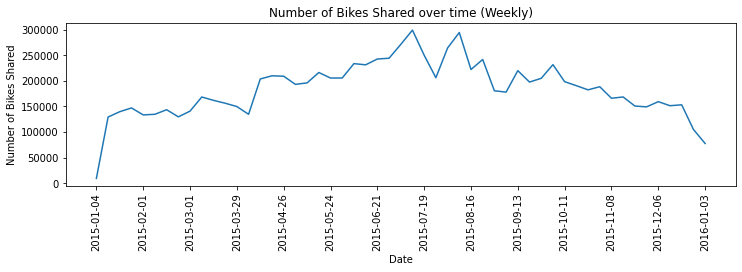

In [33]:
data_weekly_subset = data_weekly.loc['2015-01-04':'2016-01-04']

# plot the weekly counts
fig = plt.figure(figsize = (12,3))
plt.plot(data_weekly_subset.index, data_weekly_subset['cnt'])
plt.xlabel('Date')
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared over time (Weekly)')
plt.xticks(data_weekly_subset.index[::4], rotation = 90)
plt.show()

It is difficult to identify any distinct **monthly** seasonality in this time series. Although there are some peaks and drops within the weeks of a month, they do not appear to occur at the same weeks consistently.

### 5.0.5 Bikes Shared Monthly

To check for any indications of Yearly seasonality, we will generate a time series plot that shows the monthly count of shared bikes over the course of all the time points.

In [35]:
# Create a new dataframe which changes the frequency of the data to monthly
data_monthly = data.resample("M").sum()
data_monthly.head()

C:\Users\coder\AppData\Local\Temp\ipykernel_17208\3573740347.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_monthly = data.resample("M").sum()


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-31,546639,4101.0,2255.5,51005.00,12502.00,2211.0,0.0,192.0,2013.0
2015-02-28,543594,3721.5,1868.0,51950.00,9873.50,2409.0,0.0,192.0,2013.0
2015-03-31,695934,6093.5,4558.5,51832.25,12938.25,1940.0,0.0,215.0,0.0
2015-04-30,831582,7873.0,7112.5,48468.00,10988.50,1642.0,48.0,191.0,0.0
2015-05-31,895413,10091.5,9803.5,47939.00,14268.50,1900.0,48.0,240.0,0.0


The code above calculates the sum of each column for each month, which is useful for the `cnt` column if we want to see the total number of bikes shared at the end of each month. However, this approach is not applicable to other columns such as `t1` which represents temperature. For plotting the time series, we only need to consider the `cnt` column and can ignore the other columns.

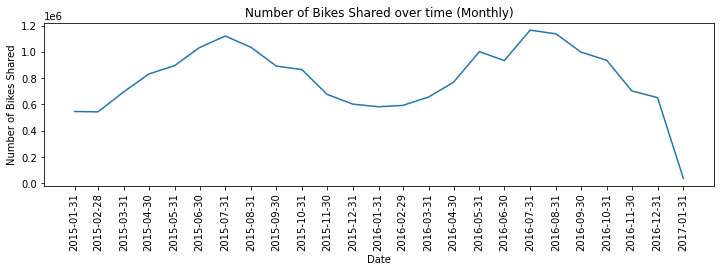

In [36]:
# plot the monthly counts
fig = plt.figure(figsize = (12,3))
plt.plot(data_monthly.index, data_monthly['cnt'])
plt.xlabel('Date')
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared over time (Monthly)')
plt.xticks(data_monthly.index, rotation = 90)
plt.show()

From this monthly time series plot we can see that there is **Yearly Seasonality**. We can see that the level of bike sharing is lowest during the winter and spring months (December - April) and highest during the summer months, which is consistent with the patterns observed in the scatter plots.

## 5.1 Addressing The Distinct Peaks

Earlier when we were visualizing our time series, we notice two spikes that stood out more than other. We will perform further visualization and analysis to identify why so many bikes were shared at those times and whether or not these values are outliers or not.

### 5.1.1 Bikes Shared Daily Over Entire Time Series

We are going to plot the daily number of bikes shared over the entire time series to see which dates these peaks occur at and also identify other potential outliers.

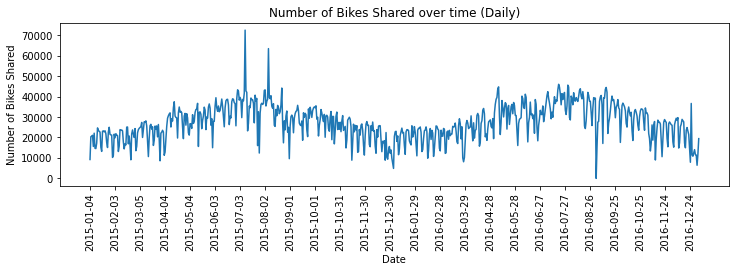

In [38]:
# plot the daily counts
fig = plt.figure(figsize = (12,3))
plt.plot(data_daily.index, data_daily['cnt'])
plt.xlabel('Date')
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared over time (Daily)')

# set xtick 
plt.xticks(data_daily.index[::30], rotation=90)

plt.show()

We can observe two significant peaks and declines in the number of bikes shared during a particular day in July and August, as well as a day in September. It is possible that these data points represent outliers, and we will conduct further analysis to investigate the potential reasons behind these extreme values.

###  5.1.2 Observing First Peak

We can zoom on to the first peak to identify why it occurs.

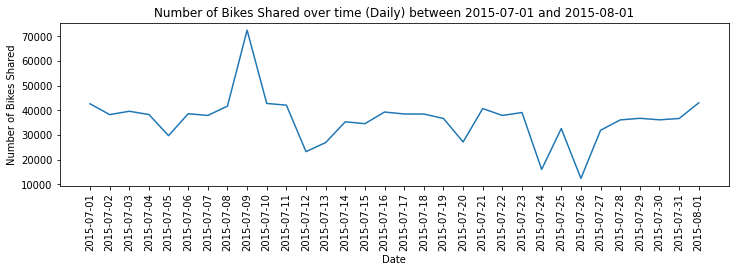

In [39]:
start_date = '2015-07-01'
end_date = '2015-08-01'

data_daily_subset = data_daily.loc[start_date:end_date]

# plot the daily counts
fig = plt.figure(figsize = (12,3))
plt.plot(data_daily_subset.index, data_daily_subset['cnt'])
plt.xlabel('Date')
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared over time (Daily) between {} and {}'.format(start_date, end_date))

# rotate the xticks by 90 degrees
plt.xticks(data_daily_subset.index, rotation=90)

plt.show()

We can observe a significant surge in the number of shared bikes on '2015-07-09'. To gain more insights, we can further investigate the hourly bike shares on this particular date.

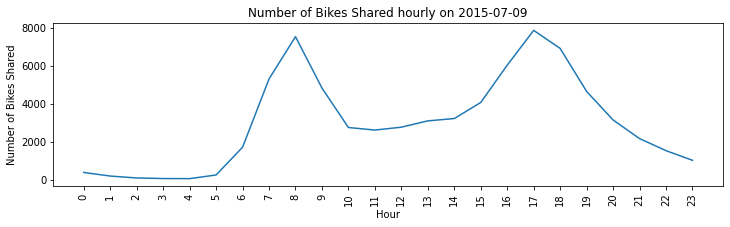

In [40]:
data_first_peak = data.loc['2015-07-09']

# visualize the number of bikes shared hourly for '2015-07-09'
fig = plt.figure(figsize = (12,3))
plt.plot(data_first_peak.index.hour, data_first_peak['cnt'])
plt.xlabel('Hour')
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared hourly on 2015-07-09')
plt.xticks(data_first_peak.index.hour, rotation = 90)
plt.show()

Based on the time series plot, the peak in bikes shared on `2015-07-09` does not seem to be an outlier since the hourly distribution of bikes shared on that day follows the same seasonal pattern as observed in other days, which is consistent with our other visualizations. The pattern shows a peak at 8 am and another at 5 pm. The high number of bikes shared on that day may be due to other factors, and it is not necessarily an anomaly in the seasonal pattern.

### 5.1.3 Observing Second Peak

We can zoom on to the second peak to identify why it occurs.

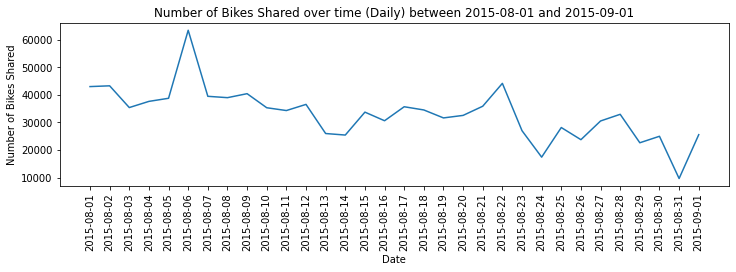

In [41]:
start_date = '2015-08-01'
end_date = '2015-09-01'

data_daily_subset = data_daily.loc[start_date:end_date]

# plot the daily counts
fig = plt.figure(figsize = (12,3))
plt.plot(data_daily_subset.index, data_daily_subset['cnt'])
plt.xlabel('Date')
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared over time (Daily) between {} and {}'.format(start_date, end_date))

# rotate the xticks by 90 degrees
plt.xticks(data_daily_subset.index, rotation=90)

plt.show()

We can observe a significant surge in the number of shared bikes on `2015-08-06`. To gain more insights, we can further investigate the hourly bike shares on this particular date.

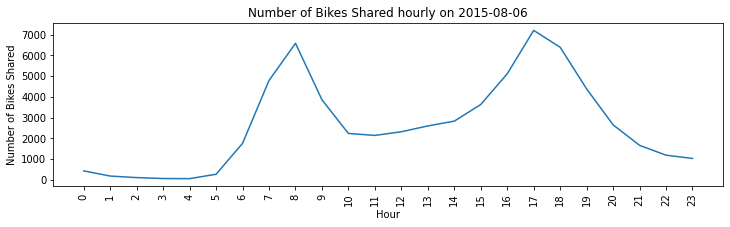

In [42]:
data_second_peak = data.loc['2015-08-06']

# visualize the number of bikes shared hourly for '2015-07-09'
fig = plt.figure(figsize = (12,3))
plt.plot(data_second_peak.index.hour, data_second_peak['cnt'])
plt.xlabel('Hour')
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared hourly on 2015-08-06')
plt.xticks(data_second_peak.index.hour, rotation = 90)
plt.show()

Based on the time series plot, the peak in bikes shared on `2015-08-06` does not seem to be an outlier since the hourly distribution of bikes shared on that day follows the same seasonal pattern as observed in other days, which is consistent with our other visualizations. The pattern shows a peak at 8 am and another at 5 pm. The high number of bikes shared on that day may be due to other factors, and it is not necessarily an anomaly in the seasonal pattern.

### 5.1.4 Observing Sharp Drop

We can zoom on to the drop to identify why it occurs.

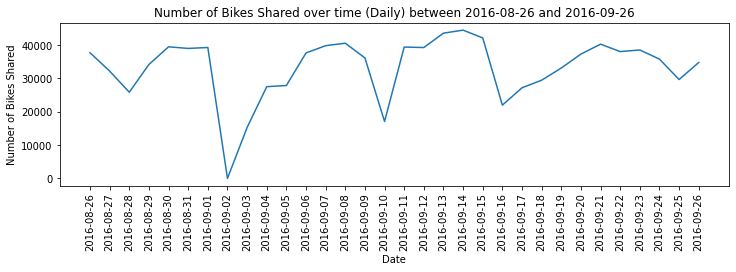

In [43]:
start_date = '2016-08-26'
end_date = '2016-09-26'

data_daily_subset = data_daily.loc[start_date:end_date]

# plot the daily counts
fig = plt.figure(figsize = (12,3))
plt.plot(data_daily_subset.index, data_daily_subset['cnt'])
plt.xlabel('Date')
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared over time (Daily) between {} and {}'.format(start_date, end_date))

# rotate the xticks by 90 degrees
plt.xticks(data_daily_subset.index, rotation=90)

plt.show()

We can observe a significant drop in the number of shared bikes on `2016-09-02`. To gain more insights, we can further investigate the hourly bike shares on this particular date.

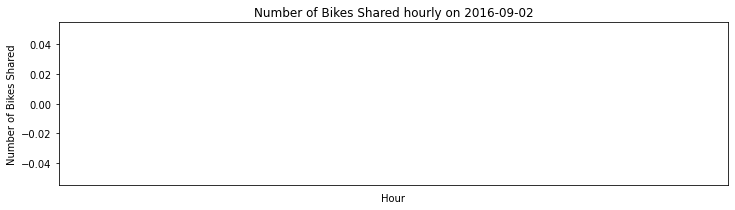

In [44]:
data_sharp_drop = data.loc['2016-09-02']

# visualize the number of bikes shared hourly for '2015-07-09'
fig = plt.figure(figsize = (12,3))
plt.plot(data_sharp_drop.index.hour, data_sharp_drop['cnt'])
plt.xlabel('Hour')
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared hourly on 2016-09-02')
plt.xticks(data_sharp_drop.index.hour, rotation = 90)
plt.show()

The date `2016-09-02` does not exist in the time series data for some reason. We're gonna leave it be. Alternatively we can populate it with the previous date's data as we can assume what the data can look like based on our previous visualizations. The date `2016-09-02` is a Friday/Workday/Non-Holiday therefore we can populate it with the previous date which is also a Workday/Non-Holiday.

# 6.0 Forecasting with XGBoost

In this section, our goal is to train an XGBoost model using the available data. Furthermore, we aim to conduct hyperparameter tuning to identify the optimal set of hyperparameter values for the model.

In [45]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

## 6.1 Prepare the data

Split the data into training and testing sets. The testing set is the period we are will be forecasting.

In [46]:
data = data.drop(['t1_bins','t2_bins','hum_bins','wind_speed_bins'], axis = 1)

In [47]:
def split_dataset(data, train_percentage, features):
        
    # split the data into training and test set
    train_size = int(train_percentage*len(data))
    test_size = len(data) - train_size
    
    train_data = data[:train_size]
    test_data = data[train_size:]
    
    # split the data into features and target variable
    X_train = train_data[features]
    y_train = train_data["cnt"]

    X_test = test_data[features]
    y_test = test_data["cnt"]
    
    return X_train, y_train, X_test, y_test

In [48]:
features = data.columns[1:].tolist()
train_percentage = 0.8

X_train, y_train, X_test, y_test = split_dataset(data, train_percentage, features)

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (13931, 8)
Shape of y_train: (13931,)
Shape of X_test: (3483, 8)
Shape of y_test: (3483,)


## 6.2 Define the XGBoost Model and perform Hyperparameter tuning

Our approach involves training an XGBoost model and conducting hyperparameter tuning using grid search to identify the optimal values that produce the most favorable outcomes.

In [49]:
from sklearn.model_selection import GridSearchCV

# define xgboost model
model = xgb.XGBRegressor()

# Define the hyperparameters for tuning
params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# perform hyperparameter tuning using gridsearch
grid_search = GridSearchCV(model, params, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [50]:
# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}


In [51]:
# Fit the model on the training set with the best hyperparameters
model = grid_search.best_estimator_
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

## 6.3 Make Predictions and Evaluate

In [52]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

MSE: 940945.1929027574
RMSE: 970.0232950309788


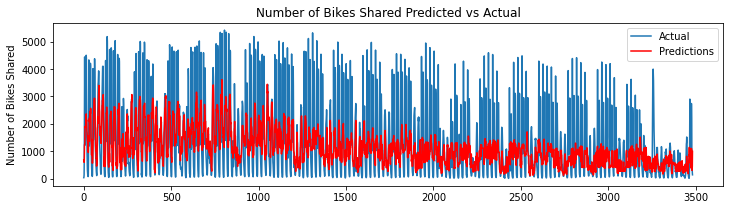

In [53]:
# visualize the number of bikes shared hourly for '2015-07-09'
fig = plt.figure(figsize = (12,3))
plt.plot(y_test.values, label = 'Actual')
plt.plot(y_pred, label = "Predictions", color = "r")
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared Predicted vs Actual')
plt.legend()
plt.show()

# 7.0 Feature Engineering

We will perform feature engineering on the time series data to potentially enhance the performance of the XGBoost model.

## 7.1 Hourly, Daily, Monthly Indicators

During our time series analysis, we observed that the data displayed daily, weekly, and yearly seasonality. 

The `daily` seasonality was evident by an increase in bike rentals before and after work on weekdays, and in the late afternoon on weekends. 
We also noticed recurring patterns throughout the week, indicating `weekly` seasonality. 
Finally, we observed that bike rentals peaked during the warmer months and declined during the colder months, indicating `yearly` seasonality.

We already have some feature regarding the timestamp such as: `is_weekend`, `is_holiday`

In [54]:
# create hourly, daily, weekly, and monthly indicators
data['hour'] = data.index.hour
data['dayofweek'] = data.index.dayofweek
data['weekofyear'] = data.index.weekofyear
data['month'] = data.index.month

C:\Users\coder\AppData\Local\Temp\ipykernel_17208\4188994145.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data['weekofyear'] = data.index.weekofyear


In [55]:
data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,dayofweek,weekofyear,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,6,1,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,1,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,6,1,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,6,1,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,6,1,1


### 7.2 Train Model with new Data Features

In [56]:
features = data.columns[1:].tolist()
train_percentage = 0.8

X_train, y_train, X_test, y_test = split_dataset(data, train_percentage, features)

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (13931, 12)
Shape of y_train: (13931,)
Shape of X_test: (3483, 12)
Shape of y_test: (3483,)


In [57]:
# define xgboost model
model = xgb.XGBRegressor()

# Define the hyperparameters for tuning
params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# perform hyperparameter tuning using gridsearch
grid_search = GridSearchCV(model, params, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [58]:
# Fit the model on the training set with the best hyperparameters
model = grid_search.best_estimator_
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

## 7.3 Evaluate Model with new Date Features

In [59]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

MSE: 82936.07901286003
RMSE: 287.9862479578843


In [60]:
forecast_days = y_test.index
pred_df = pd.DataFrame({'predictions': y_pred}, index = forecast_days)

y_test_df = pd.DataFrame({"actual": y_test}, index = forecast_days)

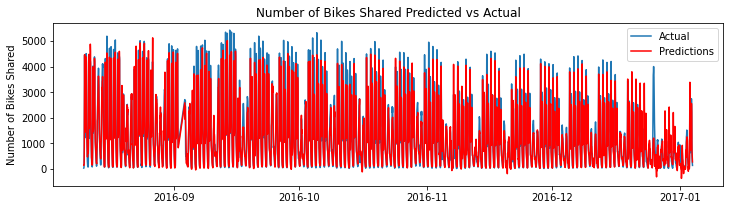

In [61]:
# visualize the number of bikes shared hourly for '2015-07-09'
fig = plt.figure(figsize = (12,3))
plt.plot(y_test_df.index, y_test_df['actual'], label = 'Actual')
plt.plot(pred_df.index, pred_df['predictions'], label = "Predictions", color = "r")
plt.ylabel('Number of Bikes Shared')
plt.title('Number of Bikes Shared Predicted vs Actual')
plt.legend()
plt.show()

Our model trained on the newly feature-engineered date data shows a significant enhancement in the MSE and RMSE scores. The advantage of these feature-engineered variables is that we can easily extract the required features for the dates we want to forecast, by just knowing the date. This provides us with the accessibility to these variables for our future predictions.

# 8.0 Conclusion

Upon analyzing the time series data, the following conclusions can be drawn:

* The features `t1` and `t2` display a positive correlation with the number of bikes shared, whereas `wind_speed` and `hum` show a negative correlation.
* On workdays, more bikes are shared as compared to weekends and holidays.
* For workdays, a pattern is observed in the number of bikes shared throughout the day with the highest number of bikes being shared at `8 am` and `5 pm`, which is assumed to be the typical work hours for London.
* For `weekends` and `holidays`, a large number of bikes are shared in the afternoon, with only one peak observed.
* The time series displays `daily`, `weekly`, and `yearly` seasonality, with patterns repeating every 24 hours, each week, and every year, respectively. Bikes shared increase at the start of each week and decrease on Fridays, while peaks are observed during warmer months and drops during colder months.
* Abnormally large peaks were observed on `2017-07-09` and `2017-08-06`, which followed the same pattern as other days. Further analysis was inconclusive, and it remains unclear if there were any events that may have caused these spikes.
* The initial XGBoost model effectively captured the trend and seasonality of the data.
* After performing feature engineering to extract date features, the model's performance significantly improved.